In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data = pd.read_csv("diabetes_data_2019.csv")
ger = pd.read_csv('germany.csv')

In [5]:
ger.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,3.703500,121.182500,69.145500,20.935000,80.254000,32.193000,0.470930,33.090500,0.342000
std,3.306063,32.068636,19.188315,16.103243,111.180534,8.149901,0.323553,11.786423,0.474498
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,63.500000,0.000000,0.000000,27.375000,0.244000,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,40.000000,32.300000,0.376000,29.000000,0.000000
75%,6.000000,141.000000,80.000000,32.000000,130.000000,36.800000,0.624000,40.000000,1.000000
max,17.000000,199.000000,122.000000,110.000000,744.000000,80.600000,2.420000,81.000000,1.000000


In [16]:
def iqr_clear(data):
    col = data.columns
    for i in col:
        q1 = data[i].quantile(0.25)
        q3 = data[i].quantile(0.75)
        iqr = q3 - q1
        lower_limit = q1 - 1.5*iqr
        upper_limit = q3 + 1.5*iqr
        data = data[(data[i] > lower_limit)&(data[i] < upper_limit)]
    return data  
        

In [17]:
ger =  iqr_clear(ger)

In [19]:
ger.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,1652.000000,1652.00000,1652.000000,1652.000000,1652.000000,1652.000000,1652.000000,1652.00000,1652.000000
mean,3.611380,118.92615,71.877724,21.314165,71.910412,32.074879,0.429383,32.26816,0.337772
std,3.167876,28.98314,11.362996,15.126239,84.694065,6.385916,0.248532,10.62066,0.473094
min,0.000000,44.00000,38.000000,0.000000,0.000000,18.200000,0.078000,21.00000,0.000000
25%,1.000000,99.00000,64.000000,0.000000,0.000000,27.400000,0.238750,24.00000,0.000000
50%,3.000000,114.00000,72.000000,23.500000,49.000000,32.000000,0.363000,28.00000,0.000000
75%,6.000000,136.00000,80.000000,32.000000,126.000000,36.100000,0.583000,39.00000,1.000000
max,13.000000,198.00000,106.000000,60.000000,335.000000,49.700000,1.162000,63.00000,1.000000


In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 767 entries, 0 to 766
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               767 non-null    int64  
 1   Glucose                   767 non-null    int64  
 2   BloodPressure             767 non-null    int64  
 3   SkinThickness             767 non-null    int64  
 4   Insulin                   767 non-null    int64  
 5   BMI                       767 non-null    float64
 6   DiabetesPedigreeFunction  767 non-null    float64
 7   Age                       767 non-null    int64  
 8   Outcome                   767 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [21]:
data.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [22]:
data.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

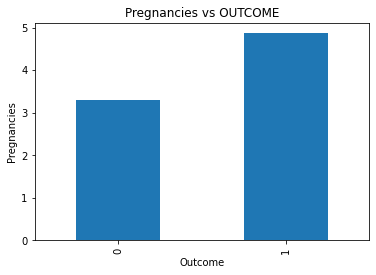

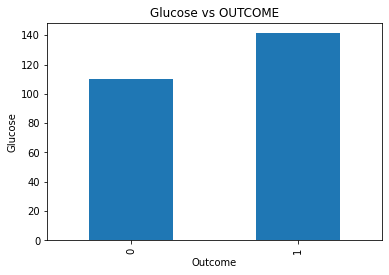

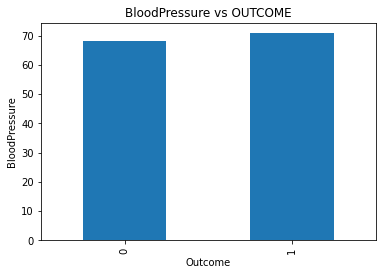

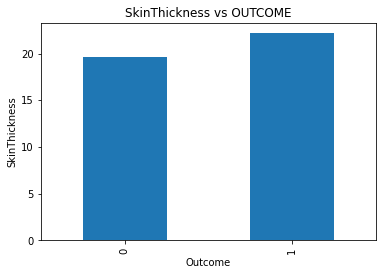

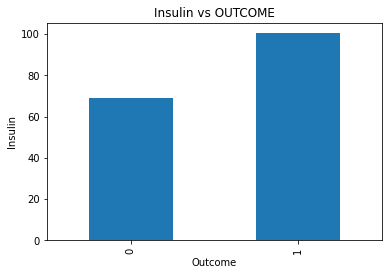

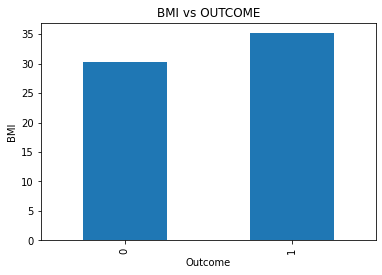

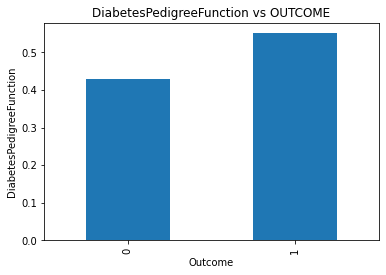

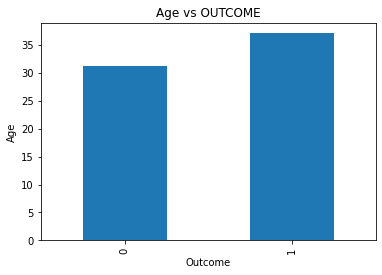

In [23]:
for i in ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin','BMI', 'DiabetesPedigreeFunction', 'Age']:
    data.groupby('Outcome')[i].mean().plot(kind = 'bar')
    plt.title(f'{i} vs OUTCOME')
    plt.ylabel(i)
    plt.show()

<AxesSubplot:>

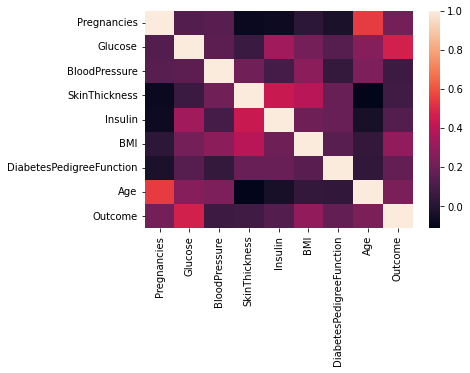

In [24]:
sns.heatmap(data.corr())

In [36]:
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
# Create arrays for the features and the response variable
y = ger['Outcome'].values
X = ger.drop(['Outcome'], axis = 1 ).values

# Create a k-NN classifier with 6 neighbors: knn
for i in range(1,20):
    knn = KNeighborsClassifier(n_neighbors = i)

    X_train, X_test , y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)
# Fit the classifier to the data
    scaler = StandardScaler()
    X_train =  scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)
    knn = knn.fit(X_train,y_train)

# Predict the labels for the training data X
    y_pred = knn.predict(X_test)
    print((y_pred != y_test).sum())
# Predict and print the label for the new data point X_new
# new_prediction = knn.predict(X_new)
# print("Prediction: {}".format(new_prediction))


291
193
259
190
227
184
208
183
198
181
191
171
183
174
180
174
181
174
178


In [39]:
knn = KNeighborsClassifier(n_neighbors = 4)
X_train, X_test , y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)
# Fit the classifier to the data
scaler = StandardScaler()
X_train =  scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
knn = knn.fit(X_train,y_train)


# Predict the labels for the training data X
y_pred = knn.predict(X_test)
print((y_pred != y_test).sum())

190


In [40]:
print((y_pred != y_test).sum()*100/len(y_test))

38.306451612903224


In [41]:
X2_test =data.drop(['Outcome'], axis = 1 ).values
X2_test = min_max.transform(X2_test)

In [42]:
y_pred2 = knn.predict(X2_test)

In [43]:
y_test2 = data['Outcome'].values

In [44]:
print((y_pred2 != y_test2).sum()*100/len(y_test2))

33.63754889178618


In [31]:
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
762,9,89,62,0,0,22.5,0.142,33,0
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0


In [32]:
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
762,9,89,62,0,0,22.5,0.142,33,0
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0


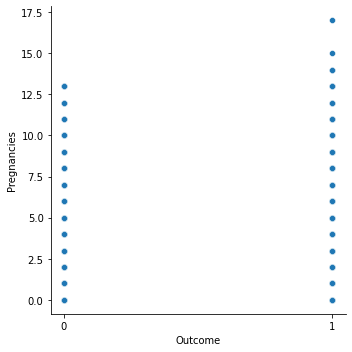

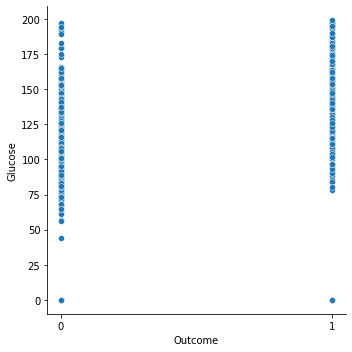

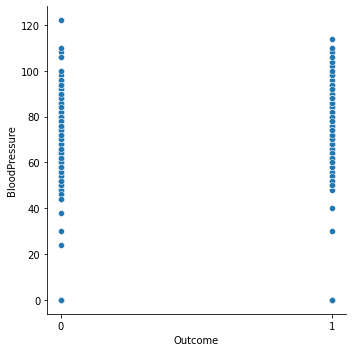

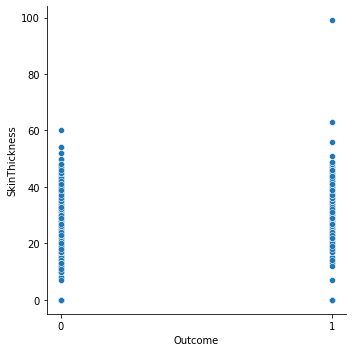

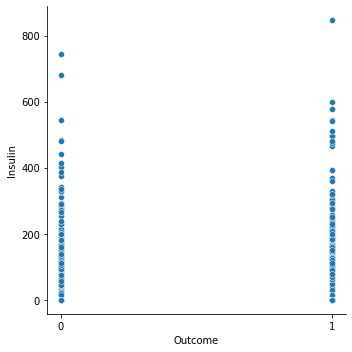

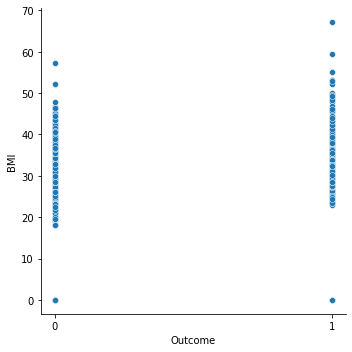

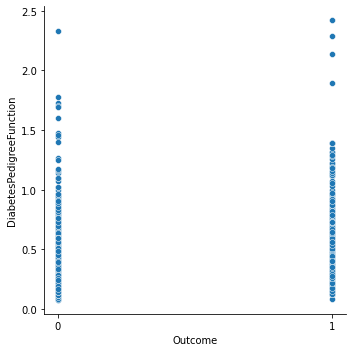

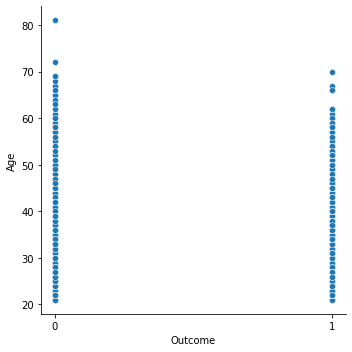

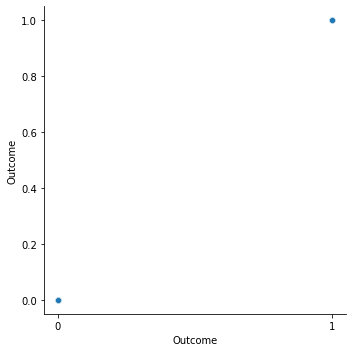

In [33]:
for i in  ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin','BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']:
    
        sns.relplot(x = 'Outcome' , y = i, data = data , kind = 'scatter')
        plt.xticks(ticks=[0,1])

In [34]:
data.columns


Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')